In [1530]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GuassianNB
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import seaborn as sns
from  matplotlib import pyplot as plt

In [1343]:
data= pd.read_csv("D:\Downloads\AI\DOWNLOADS 2.0\Data science\Data science course\Data sets\heart.csv")

In [1344]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [1345]:
data.shape

(1025, 14)

In [1346]:
data.size

14350

In [1347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [1348]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1349]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [1350]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [1351]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [1352]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<AxesSubplot:>

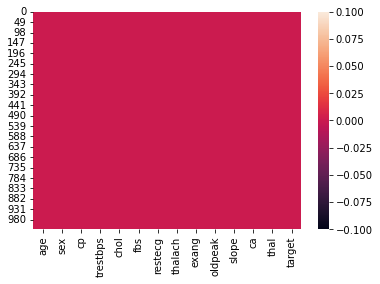

In [1353]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='sex', ylabel='count'>

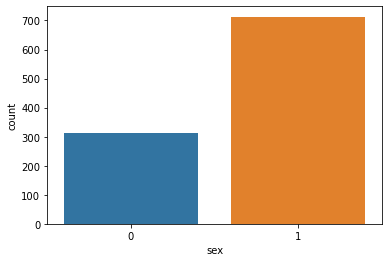

In [1354]:
sns.countplot(x='sex',data=data)

In [1355]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

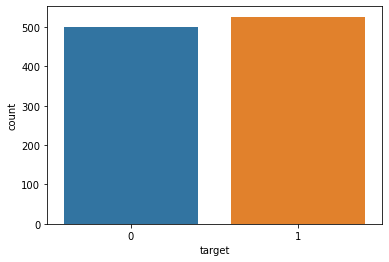

In [1356]:
sns.countplot(x='target',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

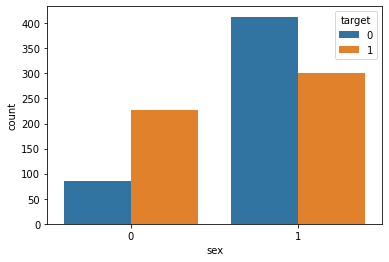

In [1357]:
sns.countplot(x='sex',hue='target',data=data)

<AxesSubplot:>

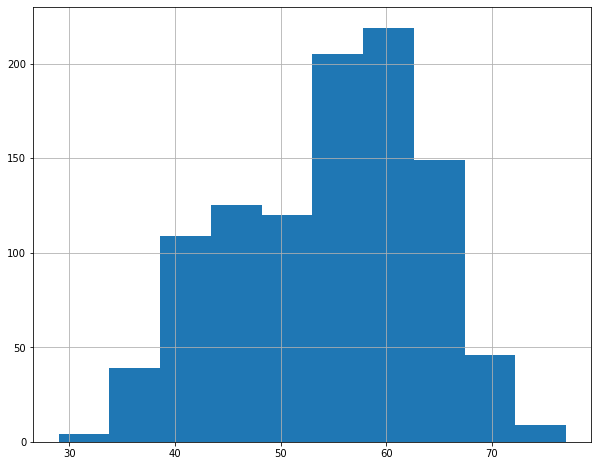

In [1358]:
plt.figure(figsize=(10,8))
data.age.hist()

In [1360]:
#sns.set(font_scale=1.5)
#data.hist(edgecolors='black')
#linewidth=1,figsize(20,20)

In [1361]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [1362]:
#plt.plot(slope,sex)
#plt.title('line plot')
#plt.show()

<AxesSubplot:xlabel='cp', ylabel='sex'>

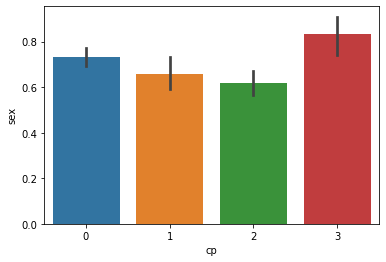

In [1363]:
sns.barplot(x="cp",y="sex",data=data)

<AxesSubplot:xlabel='age', ylabel='trestbps'>

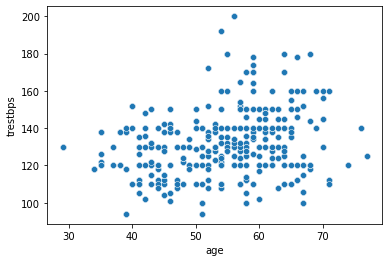

In [1364]:
sns.scatterplot(x='age',y='trestbps' ,data=data)

(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

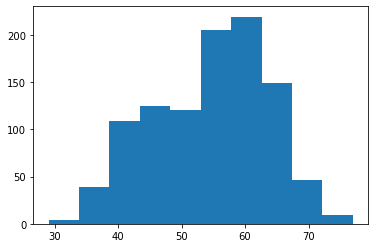

In [1365]:
plt.hist(x='age',data=data)

<AxesSubplot:>

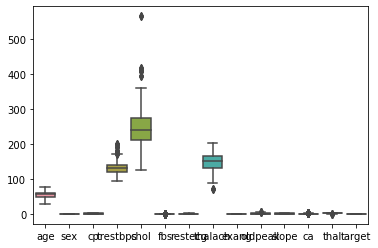

In [1366]:
sns.boxplot(data=data)

<AxesSubplot:xlabel='sex', ylabel='cp'>

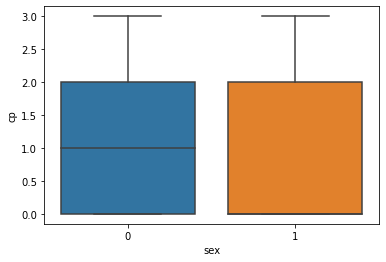

In [1367]:
sns.boxplot(x='sex',y='cp',data=data)

<AxesSubplot:>

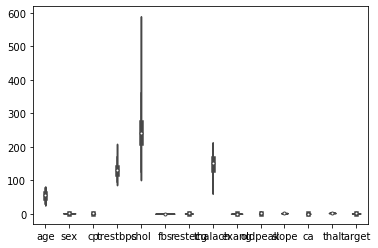

In [1368]:
sns.violinplot(data=data)

<AxesSubplot:xlabel='sex'>

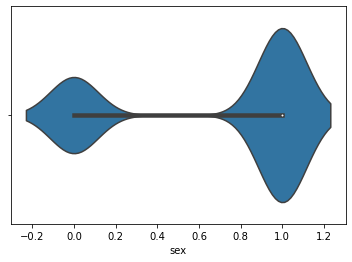

In [1369]:
sns.violinplot(x='sex',data=data)

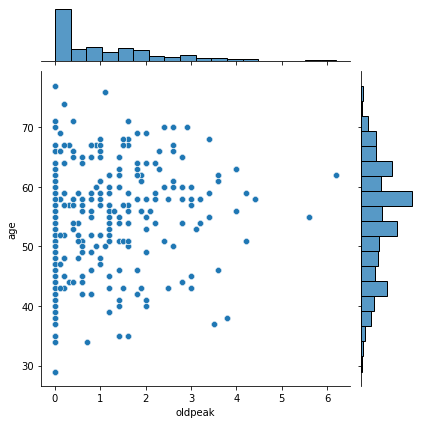

In [1370]:
sns.jointplot(x='oldpeak',y='age',data=data)

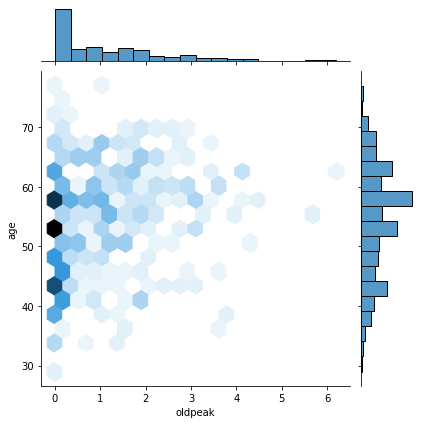

In [1371]:
sns.jointplot(x='oldpeak',y='age',data=data,kind='hex')

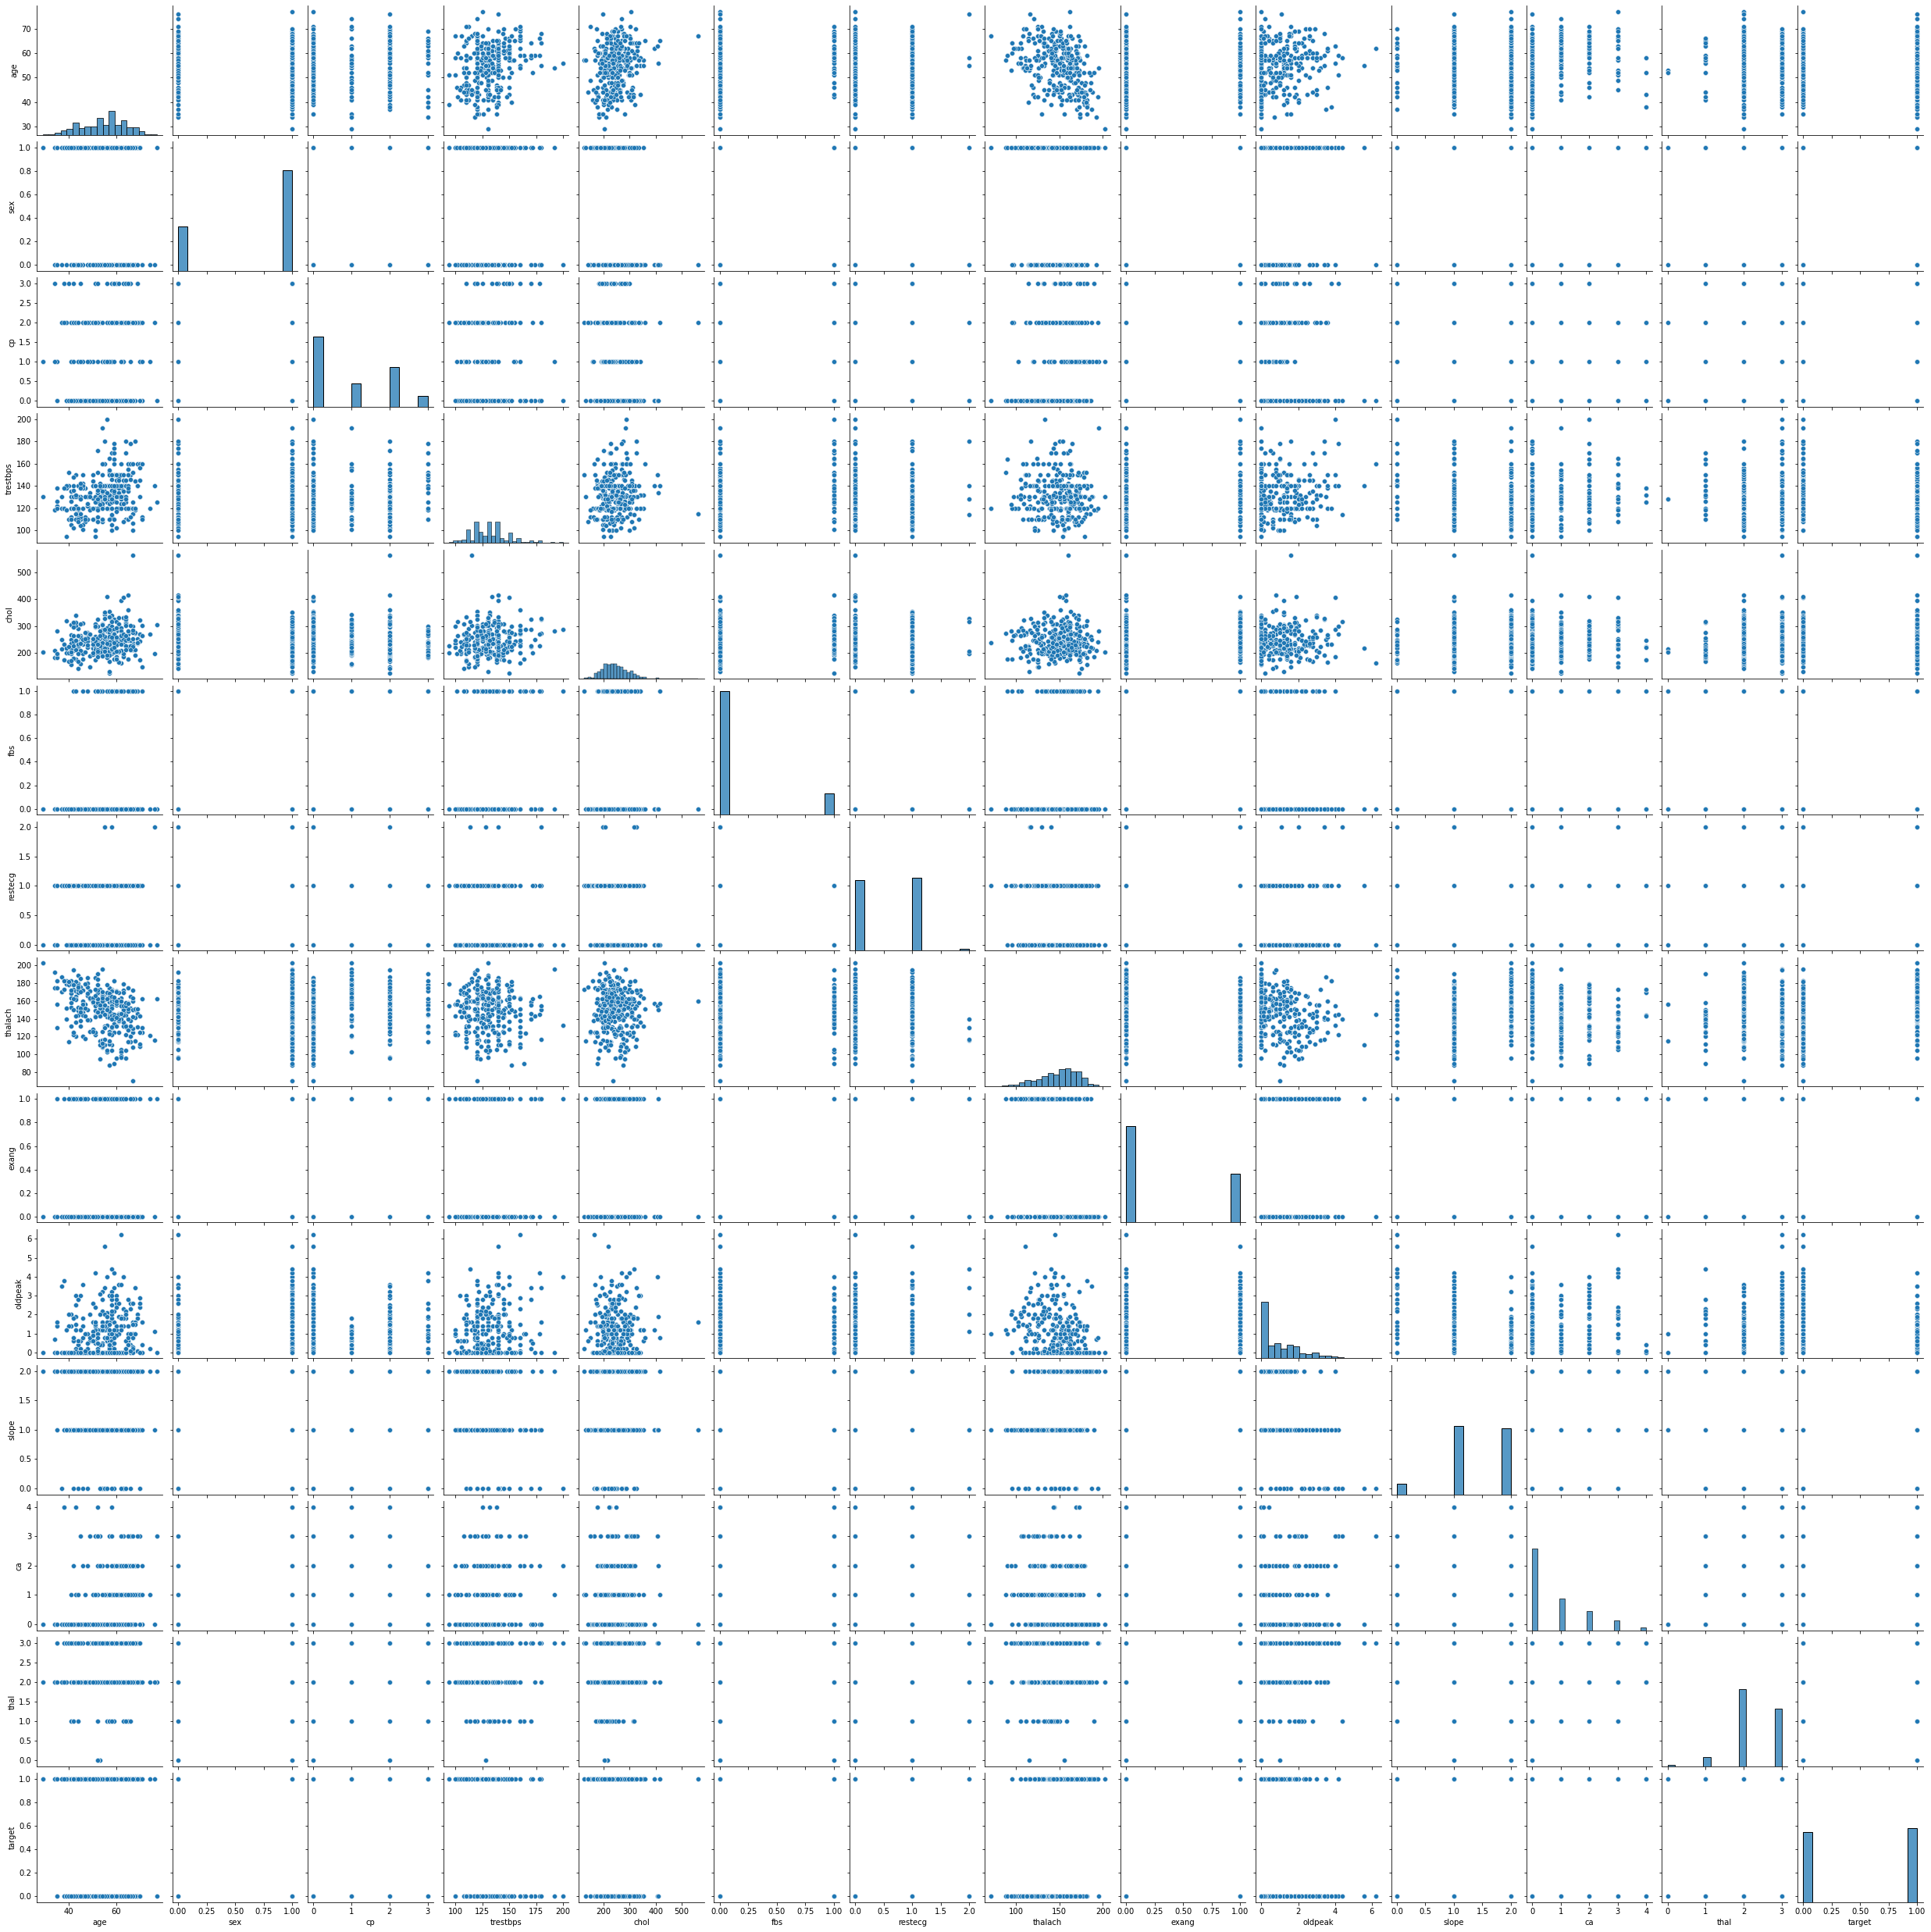

In [1372]:
sns.pairplot(data=data)

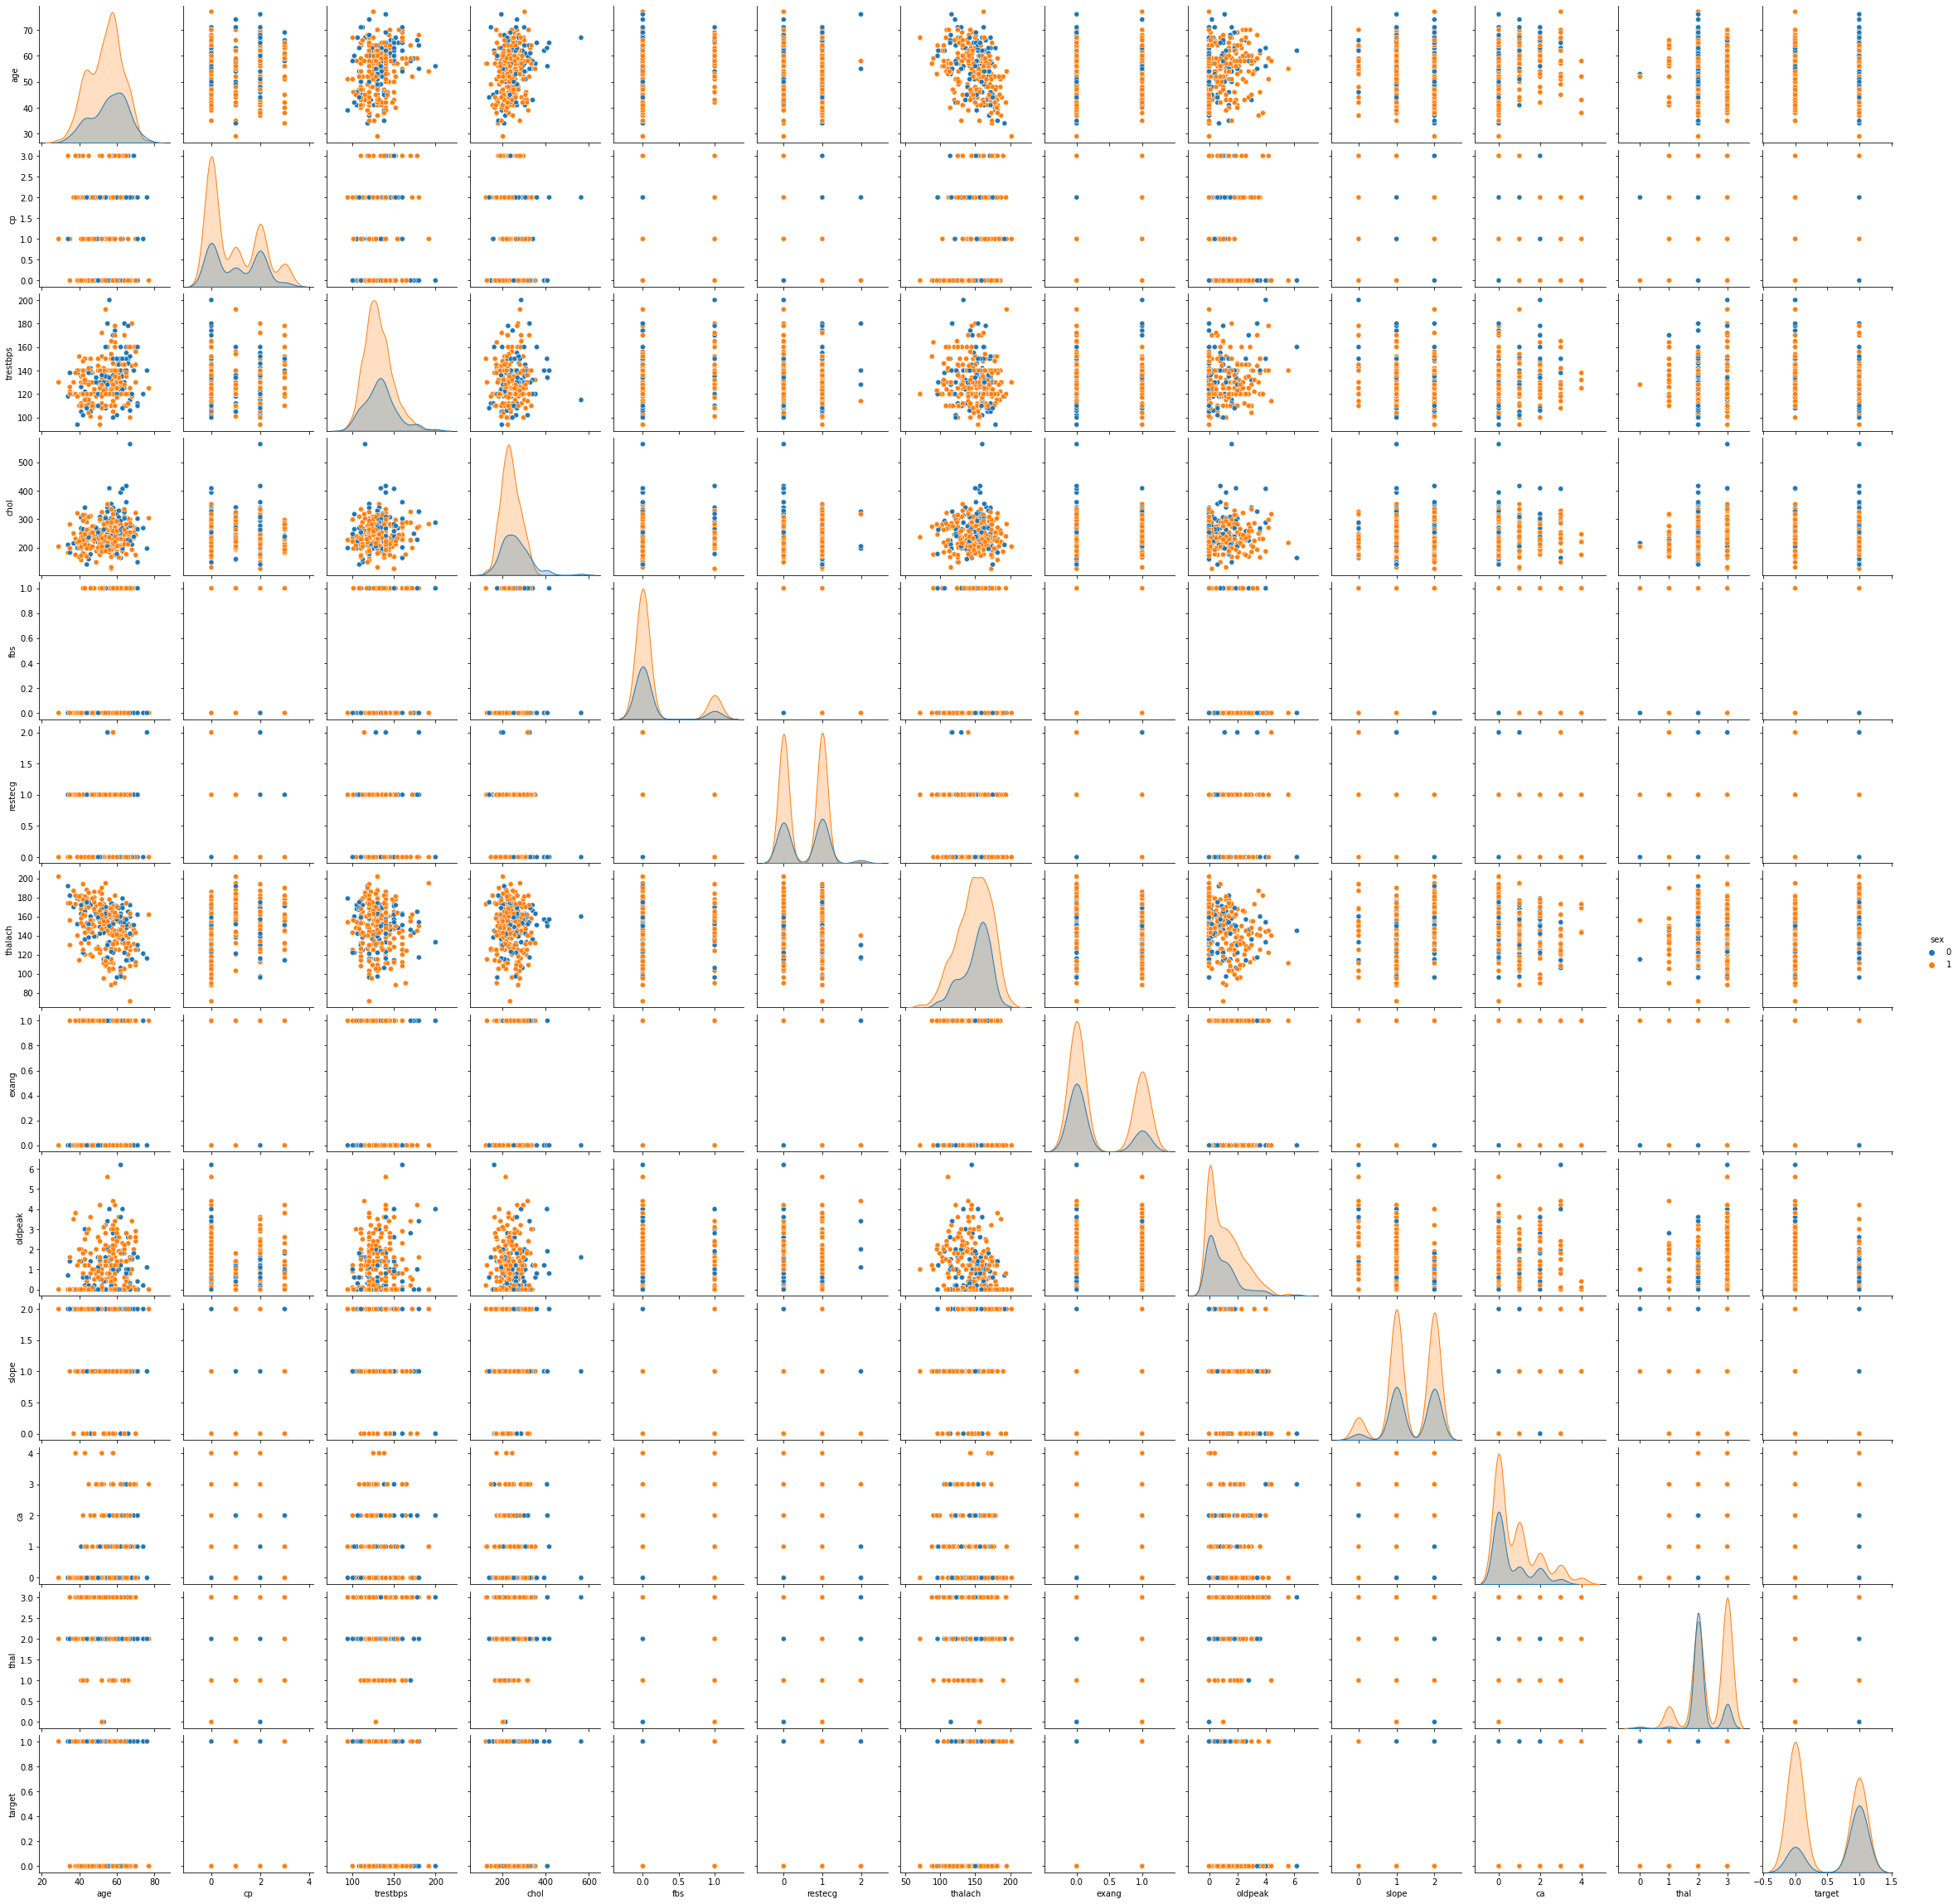

In [1373]:
sns.pairplot(data,hue='sex')

<AxesSubplot:ylabel='Count'>

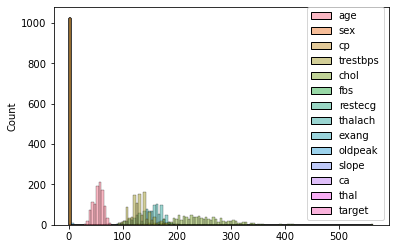

In [1374]:
sns.histplot(data=data)

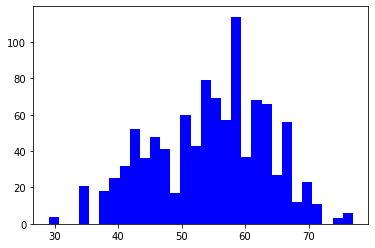

In [1375]:
plt.hist(data['age'],bins=30,color='b')
plt.show()

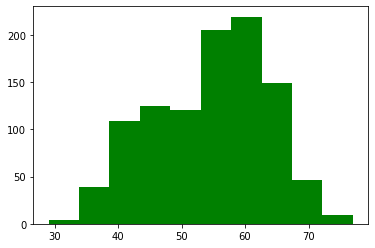

In [1376]:
plt.hist(data['age'],color='green')
plt.show()

# Pie chart
#Relationship between categorical variables

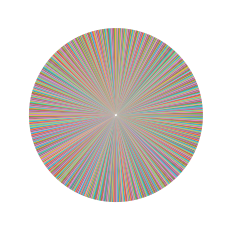

In [1756]:
plt.pie(x='sex',data=data)
plt.show()

# ML MODEL BUILDING

In [1521]:
from sklearn.tree import DecisionTreeClassifier

In [1522]:
from sklearn.linear_model import LinearRegression

In [1523]:
from sklearn.model_selection import train_test_split

In [1524]:
from sklearn.metrics import mean_squared_error

# Explanation about Model building

# Logistic Regression

In [1490]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [1742]:
y=data[['target']]
x=data[['age','sex','cp','slope','fbs']]

In [1743]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [1744]:
from sklearn.linear_model import LogisticRegression

In [1745]:
LR=LogisticRegression()

In [1746]:
LR.fit(x_train,y_train)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [1747]:
y_pred=LR.predict(x_test)

In [1748]:
y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [1749]:
LR_accuracy=accuracy_score(y_test,y_pred)*100

In [1750]:
LR_accuracy

80.97560975609757

In [1751]:
from sklearn.metrics import confusion_matrix,classification_report

In [1752]:
confusion_matrix(y_test,y_pred)

array([[90, 17],
       [22, 76]], dtype=int64)

In [1753]:
(76+90)/(76+90+17+22)*100

80.97560975609757

In [1754]:
from sklearn.metrics import plot_confusion_matrix

C:\ProgramData\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


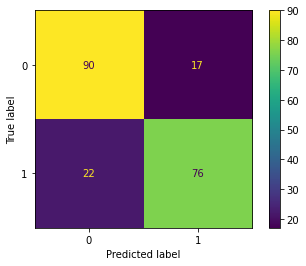

In [1755]:
disp=plot_confusion_matrix(LR,x_test,y_test)

# Decision Tree Classification

In [1594]:
y=data[['target']]
x=data[['age','cp']]

In [1595]:
from sklearn.model_selection import train_test_split

In [1596]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [1597]:
from sklearn.tree import DecisionTreeClassifier

In [1598]:
dt=DecisionTreeClassifier(random_state=5)

In [1599]:
dt.fit(x_train,y_train) #fit the modelfrom sklearn.model_selection import train_test_split

DecisionTreeClassifier(random_state=5)

In [1600]:
y_pred=dt.predict(x_test)# predict the model

In [1601]:
y_pred[:5] #predicting values

array([1, 1, 0, 0, 1], dtype=int64)

In [1602]:
x_test.head()

,age,cp
210,42,2
865,60,3
658,64,2
498,54,0
344,41,1


In [1603]:
dt_accuracy=accuracy_score(y_test,y_pred)*100

In [1604]:
dt_accuracy

86.34146341463415

In [1573]:
#model 2

In [1646]:
y=data[['target']]
x=data.drop('target',axis=1)

In [1647]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train) #fit the modelfrom sklearn.model_selection import train_test_split



DecisionTreeClassifier(random_state=5)

In [1648]:
y_pred=dt.predict(x_test)# predict the model
y_pred[:5] #predicting values


array([0, 0, 0, 0, 0], dtype=int64)

In [1649]:
dt_accuracy=accuracy_score(y_test,y_pred)*100
dt_accuracy

98.53658536585365

# Interpretation

# Random Forest

In [1651]:
y=data[['target']]
x=data[['age','sex','cp']]

In [1652]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)



In [1653]:
x_train.shape

(820, 3)

In [1654]:
y_train.shape

(820, 1)

In [1655]:
from sklearn.ensemble import RandomForestClassifier


In [1656]:
rf=RandomForestClassifier()

In [1657]:
rf.fit(x_train,y_train)

C:\Users\ThinkPad-X260\AppData\Local\Temp\ipykernel_12520\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [1658]:
y_pred=rf.predict(x_test)

In [1659]:
y_pred[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [1660]:
#x_test.head()

In [1661]:
from sklearn.metrics import mean_squared_error

In [1662]:
mean_squared_error(y_test,y_pred)

0.16585365853658537

In [1665]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4072513456534986

# Interpretation

# Conclusion

# Happy learning